In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

# Nova seção

In [ ]:
data = wb.DataReader('PG', data_source='yahoo', start='2000-1-1')

In [ ]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,53.96875,52.84375,53.90625,53.59375,4275000.0,30.625511
2000-01-04,54.18750,51.87500,53.18750,52.56250,4270800.0,30.036228
2000-01-05,52.68750,51.25000,52.43750,51.56250,5098400.0,29.464787
2000-01-06,54.71875,52.53125,52.56250,53.93750,6524200.0,30.821951
2000-01-07,58.50000,54.59375,54.78125,58.25000,9832000.0,33.286285


In [ ]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-16,138.270004,136.710007,136.710007,137.270004,5382500.0,137.270004
2020-12-17,139.119995,137.949997,138.009995,138.250000,7405300.0,138.250000
2020-12-18,140.070007,137.449997,138.259995,139.039993,19988800.0,139.039993
2020-12-21,138.429993,136.220001,137.960007,137.520004,6731600.0,137.520004
2020-12-22,138.070007,136.630005,137.289993,137.320007,1836335.0,137.320007


In [ ]:
data['Resultado'] = (data['Adj Close']/data['Adj Close'].shift(1))-1
print(data['Resultado'])

Date
2000-01-03         NaN
2000-01-04   -0.019242
2000-01-05   -0.019025
2000-01-06    0.046061
2000-01-07    0.079954
                ...   
2020-12-16    0.004537
2020-12-17    0.007139
2020-12-18    0.005714
2020-12-21   -0.010932
2020-12-22   -0.001454
Name: Resultado, Length: 5278, dtype: float64


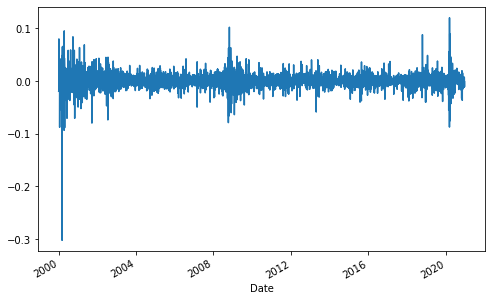

In [ ]:
data['Resultado'].plot(figsize=(8,5))
plt.show()

In [ ]:
media_simples = data['Resultado'].mean()
print(media_simples)

0.0003784732425123096


In [ ]:
media_simples = data['Resultado'].mean()*250 
print(media_simples)

0.09461831062807739


In [ ]:
print(str(round(media_simples, 5)*100)+'%')

9.462%


In [ ]:
data['RetLogaritmico'] = np.log(data['Adj Close']/data['Adj Close'].shift(1))
print(data['RetLogaritmico'])

Date
2000-01-03         NaN
2000-01-04   -0.019429
2000-01-05   -0.019208
2000-01-06    0.045031
2000-01-07    0.076918
                ...   
2020-12-16    0.004527
2020-12-17    0.007114
2020-12-18    0.005698
2020-12-21   -0.010992
2020-12-22   -0.001455
Name: RetLogaritmico, Length: 5278, dtype: float64


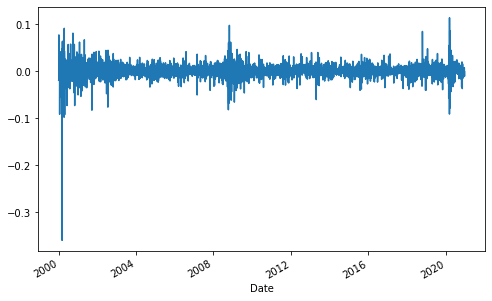

In [ ]:
data['RetLogaritmico'].plot(figsize=(8,5))
plt.show()

In [ ]:
medialog = data['RetLogaritmico'].mean()*250
print(str(round(medialog, 5)*100)+'%')

7.109%


In [ ]:
carteiras = ['PG', 'MSFT', 'F', 'GE', 'AAPL']
database = pd.DataFrame()

In [ ]:
for i in carteiras:
  database[i] = wb.DataReader(i, data_source='yahoo', start='2000-1-1')['Adj Close']

In [ ]:
database.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5278 entries, 2000-01-03 to 2020-12-22
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      5278 non-null   float64
 1   MSFT    5278 non-null   float64
 2   F       5278 non-null   float64
 3   GE      5278 non-null   float64
 4   AAPL    5278 non-null   float64
dtypes: float64(5)
memory usage: 247.4 KB


In [ ]:
database.head()

,PG,MSFT,F,GE,AAPL
Date,,,,,
2000-01-03,30.625511,37.102634,15.069453,26.190701,0.862170
2000-01-04,30.036228,35.849308,14.565937,25.143076,0.789479
2000-01-05,29.464787,36.227283,14.619884,25.099417,0.801033
2000-01-06,30.821951,35.013741,14.637873,25.434988,0.731713
2000-01-07,33.286285,35.471302,15.716831,26.419868,0.766373


In [ ]:
database.tail()

,PG,MSFT,F,GE,AAPL
Date,,,,,
2020-12-16,137.270004,219.279999,9.04,10.919954,127.809998
2020-12-17,138.250000,219.419998,9.08,10.870000,128.699997
2020-12-18,139.039993,218.589996,8.95,10.810000,126.660004
2020-12-21,137.520004,222.589996,8.93,10.770000,128.229996
2020-12-22,137.490005,224.255005,8.78,10.615000,132.190002


In [ ]:
ret_carteiras = (database/database.shift(1))-1
ret_carteiras.head()

,PG,MSFT,F,GE,AAPL
Date,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.019242,-0.033780,-0.033413,-0.040000,-0.084311
2000-01-05,-0.019025,0.010543,0.003704,-0.001736,0.014634
2000-01-06,0.046061,-0.033498,0.001230,0.013370,-0.086539
2000-01-07,0.079954,0.013068,0.073710,0.038721,0.047369


In [ ]:
pesos = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
np.dot(ret_carteiras, pesos)

array([        nan, -0.04214902,  0.00162399, ..., -0.00675123,
        0.00276551,  0.00139096])

In [ ]:
media_carteiras = ret_carteiras.mean()*100
print(media_carteiras)

PG      0.037871
MSFT    0.053091
F       0.024921
GE      0.005306
AAPL    0.129671
dtype: float64


In [ ]:
mediaretornoanual = ret_carteiras.mean() * 250
print(mediaretornoanual)

PG      0.094677
MSFT    0.132729
F       0.062303
GE      0.013265
AAPL    0.324178
dtype: float64


In [ ]:
portfolio = str(round(np.dot(mediaretornoanual, pesos), 5)*100)+'%'
print(portfolio)

12.543000000000001%


In [ ]:
pesos2 = np.array([0.3, 0.3, 0.15, 0.05, 0.2])
portfolio2 = str(round(np.dot(mediaretornoanual, pesos2), 5)*100)+'%'
print(portfolio2)

14.307%
